Import Important Libraries

In [23]:
import pandas as pd #Data Manipulation
import numpy as np
import matplotlib.pyplot as plt #Data Visualisation
import seaborn as sns #Data Vizualization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

Import training and test data

In [2]:
train_data = pd.read_csv("/Users/adityakharbanda/Desktop/Kaggle/Competitions/house-prices-advanced-regression-techniques/data/train.csv", index_col = "Id")
test_data = pd.read_csv("/Users/adityakharbanda/Desktop/Kaggle/Competitions/house-prices-advanced-regression-techniques/data/test.csv")

Check out the test data and training data

In [3]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Note: Right now, the training data contains 80 columns. However, one of them is the SalePrice, the target feature that we have to predict.

In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Checking out the columns of Training Data

In [5]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

First, let's collect the columns that have too many NULL values (to be specific: more than 20% of the total rows) into a list: **useless_cols**<br>
Since there are total 1460 rows,
20% of 1460 = 292

In [6]:
useless_cols = [col for col in train_data.columns if train_data[col].isnull().sum() >= 292]
useless_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

Let's see how many NULL values did these columns had

In [7]:
train_data[useless_cols].isnull().sum()

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

Since there are only 1460 rows, it is better to remove these columns before considering the **final training dataset**


Let's remove the rows in the training data where the SalePrice is NULL. Because, it doesn't make sense for the target variable to be NULL during training.

In [8]:
train_data.dropna(subset='SalePrice', inplace = True, axis = 0)
train_data.shape

(1460, 80)

Notice that none of the rows have an empty SalePrice. That's great!

Now, let's remove the useless columns and the SalePrice from the training data and assign the SalePrice to a variable **y_train**

In [9]:
y_train = train_data.SalePrice
train_data.drop(useless_cols+['SalePrice'], axis = 1, inplace = True)
train_data.shape

(1460, 74)

Now, let's separate and store the numerical and categorical columns of the training data into separate lists

In [10]:
num_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
len(num_cols + categorical_cols) #This value should match the total number of columns in training data

74

In [11]:
num_cols
train_data.MSSubClass

Id
1       60
2       20
3       60
4       70
5       60
        ..
1456    60
1457    20
1458    70
1459    20
1460    20
Name: MSSubClass, Length: 1460, dtype: int64

In [12]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [13]:
train_data.loc[:,categorical_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
cat_cols_dict = {col: train_data[col].nunique() for col in categorical_cols}
cat_cols_dict

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 4,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 7,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

Separate the categorical columns into **cols_OE** for Ordinal Encoding and **cols_OHE** for One Hot Encoding<br>


In [47]:
cols_OE=[col for col,value in cat_cols_dict.items() if value > 10]
cols_OHE = [col for col,value in cat_cols_dict.items() if value <= 10]

In [48]:
cols_OE

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [49]:
cols_OHE

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

create a list of final columns

In [50]:
final_cols = num_cols + cols_OE + cols_OHE

Create a X_train

In [51]:
X_train = train_data[final_cols].copy()

Now we have the training data X_train and y_train, let's create a pipeline that will preprocess data and model it.

In [52]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
OE_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=-1))
])
OHE_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_cols),
    ('oe', OE_transformer, cols_OE),
    ('ohe', OHE_transformer, cols_OHE)
])
my_model = XGBRegressor(n_estimators = 100, max_depth = 5, random_state = 0, learning_rate = 0.05)
my_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', my_model)
])

Now that the pipeline is created, let's fit the training data into it and calculate the cross val score<br>Note: since the dataset is relatively small, containing only 1460 rows, instead of explicitly separating the dataset into training and cross validation set, we use this approach instead

In [53]:
my_pipeline.fit(X_train, y_train)
scores = -1*cross_val_score(my_pipeline, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
scores.mean()

16532.730813891267

The average score as per the initial pipeline created is **16532.73**.<br>Now, let's create a function **get_score()** that takes n_estimators as arguments, and returns the mean of neg_mean_absolute_error for the number of folds (cv) in cross_val_score

In [67]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(n_estimators = n_estimators, random_state = 0, learning_rate = 0.05, max_depth = 3))
    ])
    scores = -1 * cross_val_score(my_pipeline, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
    return scores.mean()

Create a list of n_estimators to compare which one has the least value of the mean score

In [55]:
n_estimators_list = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
scores_dict = {n: get_score(n) for n in n_estimators_list}
scores_dict

{200: 15988.970810145547,
 300: 15669.159000428082,
 400: 15513.871058968323,
 500: 15439.377533711473,
 600: 15405.576599957192,
 700: 15391.590294574058,
 800: 15418.766194884418,
 900: 15422.75985926798,
 1000: 15431.806486782962}

Create a plot of n_estimators vs scores

<AxesSubplot:title={'center':'n_estimators vs scores'}, xlabel='n_estimators', ylabel='Scores'>

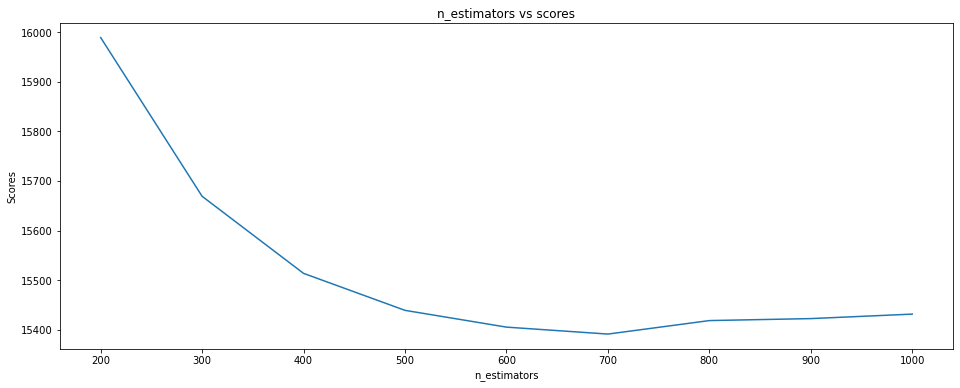

In [56]:
plt.figure(figsize = (16,6))
plt.title("n_estimators vs scores")
plt.xlabel("n_estimators")
plt.ylabel("Scores")
sns.lineplot(data = scores_dict)

From the plot, the least score corresponds to 700 n_estimators, hence create the final model with the optimal value of n_estimators in XGBRegressor

In [57]:
final_model = XGBRegressor(random_state = 0, learning_rate = 0.05, n_estimators = 700, max_depth = 3)
final_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', final_model)
])

Fit the pipeline to the entire data

In [58]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
               

Create a X_test dataset that consists of the **final_cols** only

In [62]:
X_test = test_data[final_cols].copy()
X_test.shape

(1459, 74)

Generate predictions for X_test

In [63]:
predictions = final_pipeline.predict(X_test)

Convert the predictions 

In [65]:
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions})
output

,Id,SalePrice
0,1461,118034.812500
1,1462,165703.828125
2,1463,179281.343750
3,1464,189758.593750
4,1465,182949.890625
...,...,...
1454,2915,77890.898438
1455,2916,72922.062500
1456,2917,161029.156250
1457,2918,121053.515625


In [66]:
output.to_csv('submission2.csv', index = False)